In [4]:
from google.colab import drive
drive.mount('/content/drive')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
file_path = '/content/drive/MyDrive/ML/Classification/bmi_train.csv'

df = pd.read_csv(file_path)
df.columns = df.columns.str.strip().str.lower()
required_columns = {'gender', 'height', 'weight', 'index'}
if not required_columns.issubset(df.columns):
    raise ValueError(f"Your CSV must contain the following columns: {required_columns}")

In [9]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])


In [10]:
scaler = StandardScaler()
df[['height', 'weight']] = scaler.fit_transform(df[['height', 'weight']])

In [12]:
X = df[['gender', 'height', 'weight']]
y = df['index']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


models = {
    "Logistic Regression": LogisticRegression(multi_class='ovr', max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.


Logistic Regression Performance:
Accuracy: 0.63

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         6
           2       0.32      0.53      0.40        15
           3       0.00      0.00      0.00        15
           4       0.62      0.60      0.61        30
           5       0.83      1.00      0.91        50

    accuracy                           0.63       120
   macro avg       0.30      0.36      0.32       120
weighted avg       0.54      0.63      0.58       120

Confusion Matrix:
[[ 0  0  4  0  0  0]
 [ 0  0  5  1  0  0]
 [ 0  0  8  5  2  0]
 [ 0  0  6  0  9  0]
 [ 0  0  2  0 18 10]
 [ 0  0  0  0  0 50]]


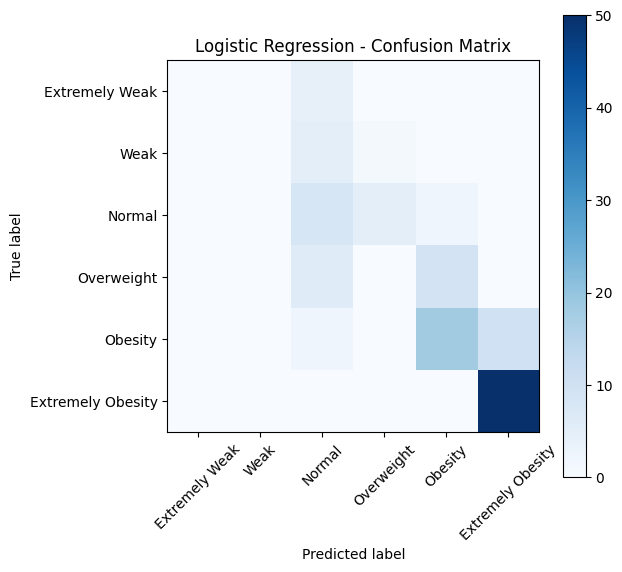


Random Forest Performance:
Accuracy: 0.78

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.75      0.50      0.60         6
           2       0.80      0.80      0.80        15
           3       0.63      0.80      0.71        15
           4       0.74      0.57      0.64        30
           5       0.87      0.94      0.90        50

    accuracy                           0.78       120
   macro avg       0.73      0.73      0.72       120
weighted avg       0.78      0.78      0.78       120

Confusion Matrix:
[[ 3  0  1  0  0  0]
 [ 2  3  1  0  0  0]
 [ 0  1 12  2  0  0]
 [ 0  0  0 12  3  0]
 [ 0  0  1  5 17  7]
 [ 0  0  0  0  3 47]]


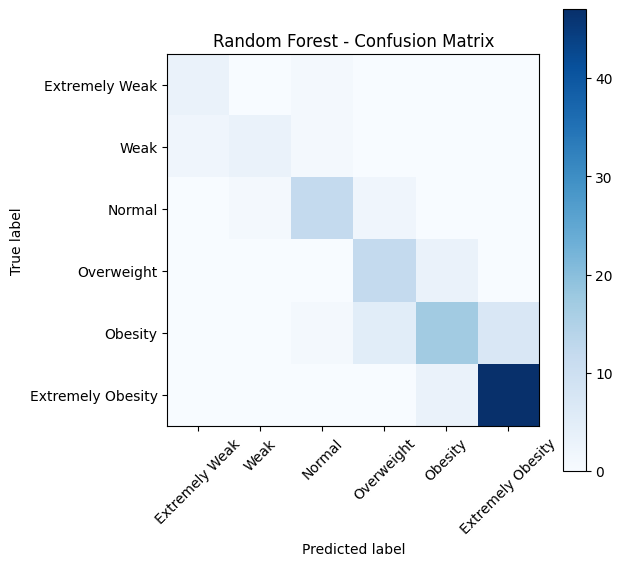

In [13]:
results = {}
for name, model in models.items():

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)


    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'report': report,
        'confusion_matrix': cm
    }


    print(f"\n{name} Performance:")
    print(f"Accuracy: {accuracy:.2f}")
    print("\nClassification Report:")
    print(report)
    print("Confusion Matrix:")
    print(cm)

    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"{name} - Confusion Matrix")
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    labels = ['Extremely Weak', 'Weak', 'Normal', 'Overweight', 'Obesity', 'Extremely Obesity']
    plt.xticks(np.arange(6), labels, rotation=45)
    plt.yticks(np.arange(6), labels)
    plt.show()


In [15]:
def predict_bmi(model, scaler, le):
    print("\nEnter your information:")
    gender_input = input("Gender (male/female): ").capitalize()
    if gender_input not in le.classes_:
        print(f"Invalid input! Please enter one of: {le.classes_}")
        return

    gender = le.transform([gender_input])[0]
    height = float(input("Your height (cm): "))
    weight = float(input("Your weight (kg): "))


    scaled_features = scaler.transform([[height, weight]])
    height_scaled = scaled_features[0][0]
    weight_scaled = scaled_features[0][1]

    user_input = np.array([[gender, height_scaled, weight_scaled]])
    prediction = model.predict(user_input)[0]

    labels = ['Extremely Weak', 'Weak', 'Normal', 'Overweight', 'Obesity', 'Extremely Obesity']
    print(f"\nPrediction result: {labels[prediction]}")

predict_bmi(results['Logistic Regression']['model'], scaler, le)


Enter your information:
Gender (male/female): male
Your height (cm): 180
Your weight (kg): 80

Prediction result: Overweight


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
